# Problems 1
## Task 1

In [66]:
import numpy as np

In [159]:
# 1
A = np.array([[1, 1, 1], [1, 1, 1]])
B = np.array([[2, 2, 2], [2, 2, 2]])

np.concatenate((A,B), axis = 1)

array([[1, 1, 1, 2, 2, 2],
       [1, 1, 1, 2, 2, 2]])

In [81]:
# 2
M = np.arange(25).reshape((5, -1))
print(M)
a = [0, 3, 4, 2]
b = [1, 4, 2, 3]

M[a, b]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


array([ 1, 19, 22, 13])

In [12]:
# 3
A = np.random.choice([0, 1, 2], 100).reshape((10, 10))
print(A)

D = A.diagonal()
print(D)

print(f'trA = {D.sum()}, кол-во ненулевых элементов: {len(D[D!=0])}')

[[0 1 0 0 1 2 2 1 0 0]
 [0 2 2 0 0 2 1 2 2 2]
 [0 2 2 0 1 1 2 2 1 0]
 [2 2 2 2 2 0 2 0 2 0]
 [0 1 1 2 1 1 1 1 0 0]
 [0 1 0 1 2 0 0 2 1 1]
 [2 0 0 2 2 2 0 2 2 1]
 [1 0 2 2 2 0 1 2 2 2]
 [2 2 0 1 0 0 1 1 0 0]
 [2 2 0 2 1 2 2 1 2 0]]
[0 2 2 2 1 0 0 2 0 0]
trA = 9, кол-во ненулевых элементов: 5


In [10]:
# 4
A = np.random.choice(np.arange(5), 12).reshape((3, 4))

A.reshape((-1,))
print(A)
unique, counts = np.unique(A, return_counts=True)
print(unique , counts)

[[4 3 1 4]
 [0 0 3 2]
 [3 1 4 3]]
[0 1 2 3 4] [2 2 1 4 3]


In [13]:
# 5
A = np.random.choice([-1, 1], 12).reshape((3, 4))
B = np.random.choice([2], 12).reshape((3, 4))

print(A, "\n\n", B)

B[A<0] = 0
B

[[-1  1  1 -1]
 [-1 -1 -1 -1]
 [-1 -1  1 -1]] 

 [[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]


array([[0, 2, 2, 0],
       [0, 0, 0, 0],
       [0, 0, 2, 0]])

In [26]:
# 6
A = np.random.choice(np.arange(5), 12).reshape((3, 4))
# A = np.random.choice([0], 12).reshape((3, 4))
A = np.array(A, dtype=np.float64)
print(A)
print(np.mean(A, axis=0))
A -= np.mean(A, axis=0)
sqrt = np.sqrt(np.sum(A**2, axis=0))
A[:, sqrt != 0] /= sqrt[sqrt != 0]
print(A)

[[1. 1. 1. 3.]
 [3. 2. 4. 3.]
 [3. 0. 3. 0.]]
[2.33333333 1.         2.66666667 2.        ]
[[-0.81649658  0.         -0.77151675  0.40824829]
 [ 0.40824829  0.70710678  0.6172134   0.40824829]
 [ 0.40824829 -0.70710678  0.15430335 -0.81649658]]


In [14]:
# 7
A = np.random.choice([-1, 1], 12).reshape((3, 4))
B = np.random.choice([2], 12).reshape((3, 4))

A.T @ B

array([[ 2,  2,  2,  2],
       [-2, -2, -2, -2],
       [ 2,  2,  2,  2],
       [ 2,  2,  2,  2]])

  0%|          | 0/8 [00:00<?, ?it/s]

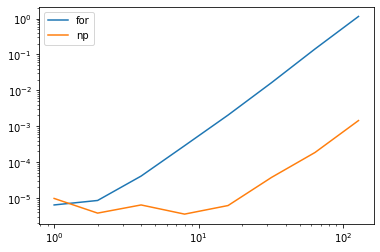

In [110]:
# 8
import matplotlib.pyplot as plt
from time import time
from tqdm.autonotebook import tqdm

N = 8
t_for = np.zeros(N)
t_np = np.zeros(N)
voc_n = np.zeros(N)

for i in tqdm(range(N)):
    n = 2**i
    voc_n[i] = n
    A = np.random.choice(np.arange(n), n*n).reshape((n, n))
    B = np.random.choice(np.arange(n), n*n).reshape((n, n))
    
    start = time()
    C = A@B
    t_np[i] = time() - start
    # print(C)
    
    start = time()
    C = np.zeros((n, n))
    for z in range(n):
        for j in range(n):
            for k in range(n):
                C[z, j] += A[z, k] * B[k, j]
                # print(C)
    t_for[i] = time() - start
    # print(C)
    
plt.plot(voc_n, t_for, label='for')
plt.plot(voc_n, t_np, label='np')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

## Task 2

In [64]:
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

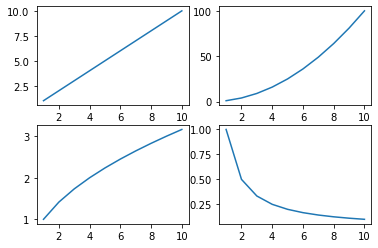

In [114]:
# 1
x = np.arange(10)+1
fig, axs = plt.subplots(2, 2)
axs[0][0].plot(x, x)
axs[0][1].plot(x, x**2)
axs[1][0].plot(x, x**0.5)
axs[1][1].plot(x, 1/x)
plt.show()

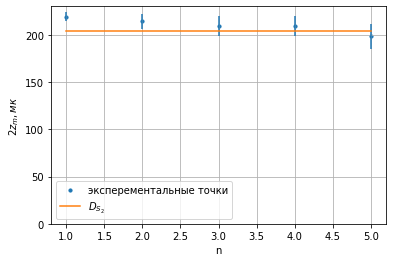

In [115]:
# 2
data = np.loadtxt('4.3.1_1.txt')
fig, ax = plt.subplots()
ax.grid(True)
ax.set(ylabel='$2z_m, мк$', xlabel='n', ylim=[0,230])
ax.scatter(data[:, 0], data[:, 3], s=10, label='эксперементальные точки')
ax.errorbar(data[:, 0], data[:, 3], data[:, 4], np.zeros(len(data[:, 3])), ls='none')
D = 204
ax.plot(data[:, 0], np.zeros(len(data[:, 3]))+D, label='$D_{S_2}$')
plt.legend()
plt.show()

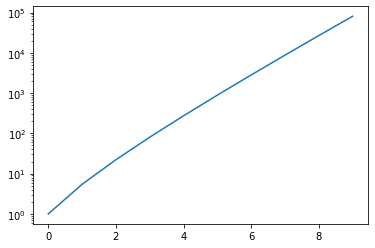

In [120]:
# 3
x = np.arange(10)
y = np.exp(x)*(x+1)
plt.plot(x, y)
plt.yscale('log')
plt.show()

## Task 3

In [86]:
import matplotlib.pyplot as plt
from time import time
from tqdm.autonotebook import tqdm
import numpy as np

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 1. 3. 0. 1. 2. 0. 2. 2. 1. 0.
 3. 0. 2. 2. 2. 2. 3. 0. 2. 1. 2. 2. 0. 2. 1. 1. 1. 1. 3. 1. 1. 0. 1. 2.
 1. 2. 2. 1. 1. 3. 1. 0. 3. 1. 3. 0. 2. 2. 3. 1. 1. 1. 4. 0. 1. 2. 1. 1.
 2. 1. 1. 0. 4. 0. 1. 1. 1. 0. 1. 1. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 3. 2. 1. 2. 1. 1. 1. 4.
 0. 4. 0. 1. 2. 0. 1. 2. 2. 4. 2. 0. 3. 1. 2. 1. 2. 1. 0. 2. 0. 3. 2. 0.
 3. 1. 1. 1. 2. 0. 2. 2. 0. 1. 1. 3. 0. 1. 1. 1. 3. 1. 0. 5. 0. 1. 1. 2.
 1. 2. 1. 4. 0. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
(2, 100) (100,) (100,)


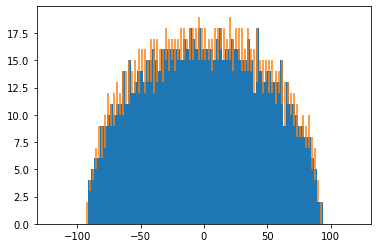

In [29]:
# 1

N = 1000
sigma = 1
x0 = 0
s = np.random.normal(x0, sigma, 1000)
num = 10
voc_v = np.empty((0,))
bins = 100
bin_min = np.ones(bins)*N
bin_max = np.zeros(bins)
# bin_min = np.zeros(bins)
# bin_max = np.ones(bins)*N
for i in range(num):
    A = np.random.choice(s, N*N).reshape((N, N))
    A += A.T
    v, _ = np.linalg.eig(A)
    h, b = np.histogram(v, bins=bins, range=(-120, 120))
    
    bin_max[bin_max < h] = h[bin_max < h]
    bin_min[bin_min > h] = h[bin_min > h]
    
    # voc_v = np.append(voc_v, v)
    # plt.hist(h, bins=bins, range=(-120, 120))
    # plt.show()
    
# print(voc_v)
# # n, bins, patches = plt.hist(voc_v, bins=10)
h, b, _ = plt.hist(v, bins=bins, range=(-120, 120))
print(bin_max-h)
print(h-bin_min)
er = np.concatenate(([h-bin_min], [bin_max-h]), axis=0)
print(er.shape, ((b[1:]+b[:-1])/2).shape, h.shape)
plt.errorbar((b[1:]+b[:-1])/2, h, er, 0, linestyle='none')
plt.show()
# print(h, b) 

  0%|          | 0/10000 [00:00<?, ?it/s]

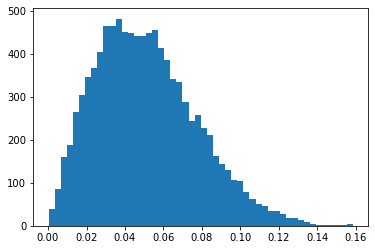

In [87]:
# 1

N = 100
sigma = 1
x0 = 0
s = np.random.normal(x0, sigma, 1000)
num = 10000
voc_rho = np.empty((0,))
bins = 100
for i in tqdm(range(num)):
    A = np.random.choice(s, N*N).reshape((N, N))
    A += A.T
    v, _ = np.linalg.eig(A)
    
    v = np.repeat([v], N, axis=0)
    v -= v.T
    v += np.diag(np.repeat(np.max(v), N))
    v = np.abs(v)
    # print(np.min(v))
    # print(np.repeat(np.max(v), N))
    # print(np.diag(np.repeat(np.max(v), N)))
    voc_rho = np.append(voc_rho, [np.min(v)])
# print(voc_rho)
_ = plt.hist(voc_rho, bins=50)